## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

**The Aim:** The aim of this notebook is to Import Libraries --> Perform Data Pre-processing --> Handling Missing Data --> Data Visualization 

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Ingestion

In [2]:
df=pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
print('-' * 50)
print('\nSize of Diamond Price data is {}\n'.format(df.shape))
print('-' * 50)
df.head()

--------------------------------------------------

Size of Diamond Price data is (193573, 11)

--------------------------------------------------


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Data Pre-Processing

In [4]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<b>Observation:</b> There are no missing values present in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


<b>Observation:</b> There are eight numerical columns and 3 Categorical columns

In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### Dropping the ID column
Since `ID` is not influential/correlated to Dependent variable `price`

In [7]:
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### Check for duplicated records

In [8]:
df.duplicated().sum()

0

<b>Observation:</b> No Duplicate records found in the dataset.

#### Segregate numerical and categorical columns


In [9]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
print('-' * 50)
print("\nStatistical Information about the Categorical Columns\n")
print('-' * 50)
df[categorical_columns].describe()

--------------------------------------------------

Statistical Information about the Categorical Columns

--------------------------------------------------


,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


### Data Visualization

In [11]:
df['cut'].value_counts()
cut_labels = df['cut'].unique()

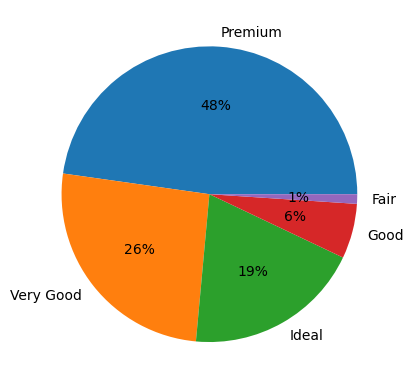

In [12]:
plt.pie(df['cut'].value_counts(),labels=cut_labels,autopct='%1.0f%%',)
plt.show()

<b>Observation:</b> 
In the following data set 
* 48% of the diamonds have ideal cut.
* 26% of the diamonds have premium cut. 
* 19% of the diamonds have Very Good cut.
* 6%  of the diamonds have Good cut 
* 1% of the diamonds have fair cut. 

Therefore, According to the grading system 48% of diamonds are of excellent quality in this dataset

Ref: https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/

In [13]:
df['color'].value_counts()
color_label=df['color'].unique()

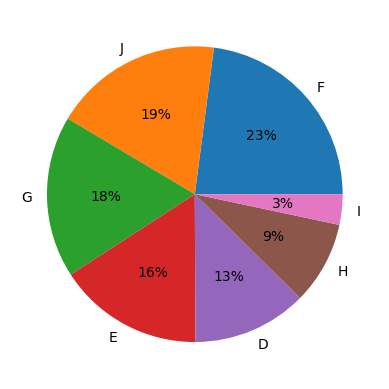

In [14]:
plt.pie(df['color'].value_counts(),labels=color_label,autopct='%1.0f%%',)
plt.show()

<b>Observation:</b> 
In the following data set 
* 23% of the diamonds are of the color F.
* 19% of the diamonds are of the color J.
* 18% of the diamonds are of the color G..
* 16% of the diamonds are of the color E.
* 13% of the diamonds are of the color D.
* 9% of the diamonds are of the color H.
* 3% of the diamonds are of the color I.

Therefore 23% of diamonds are of color F i.e Colorless in the dataset

Ref: https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/

In [15]:
df['clarity'].value_counts()
clarity_labels = df['clarity'].unique()

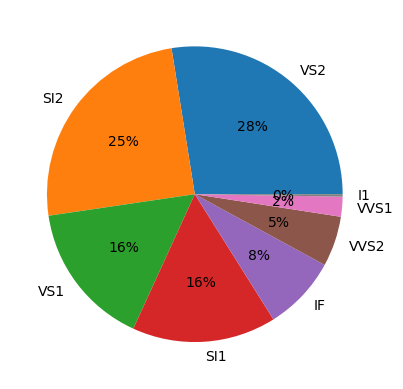

In [16]:
plt.pie(df['clarity'].value_counts(),labels=clarity_labels,autopct='%1.0f%%',)
plt.show()

<b>Observation:</b> In the following Dataset
* 28% of the diamonds are of VS2 clarity
* 25% of the diamonds are of SI2 clarity
* 16% of the diamonds are of VS1 clarity
* 16% of the diamonds are of SI1 clarity
* 8% of the diamonds are of IF clarity
* 5% of the diamonds are of VVS2 clarity
* 2% of the diamonds are of VVS1 clarity
* 0% of the diamonds are of I1 clarity

Therefore, No diamonds in the following dataset are flawless

Ref: https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/

#### Histogram Plot for Categories

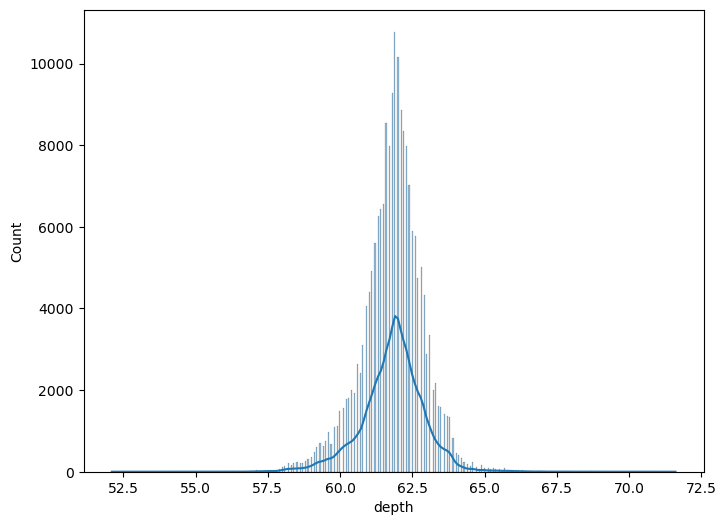

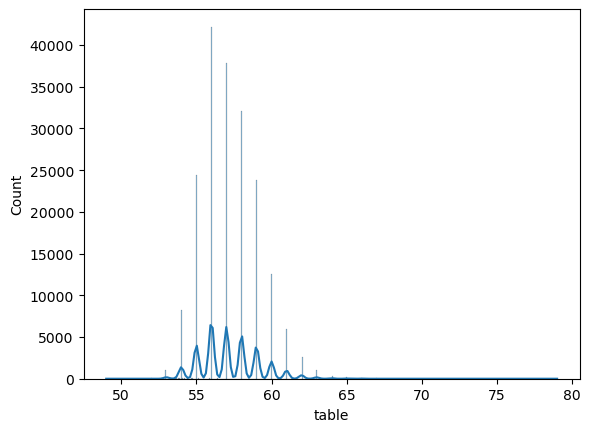

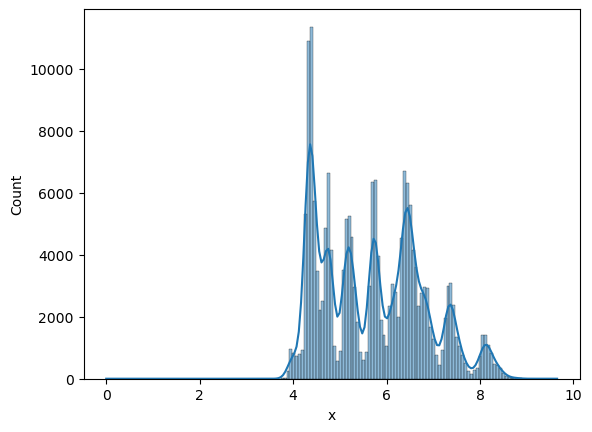

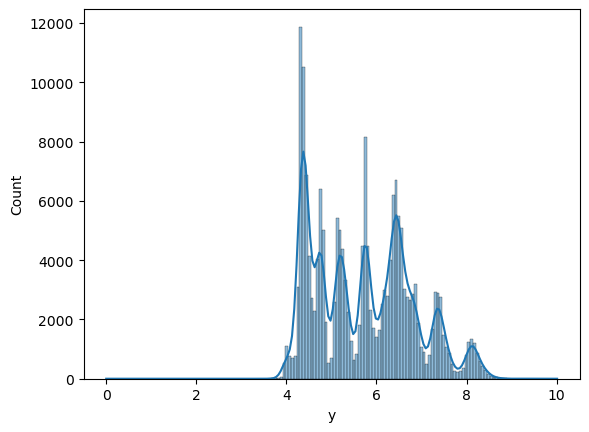

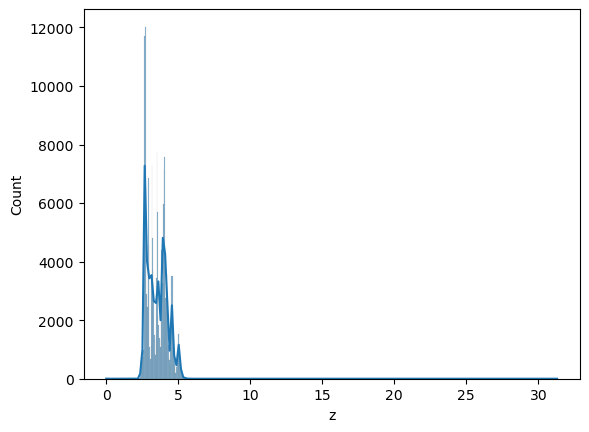

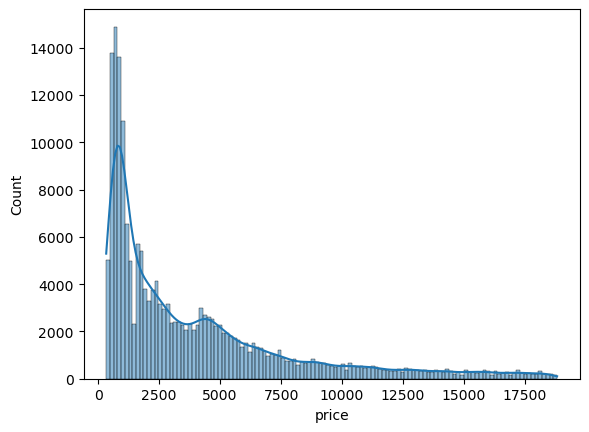

In [17]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns[1:]:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

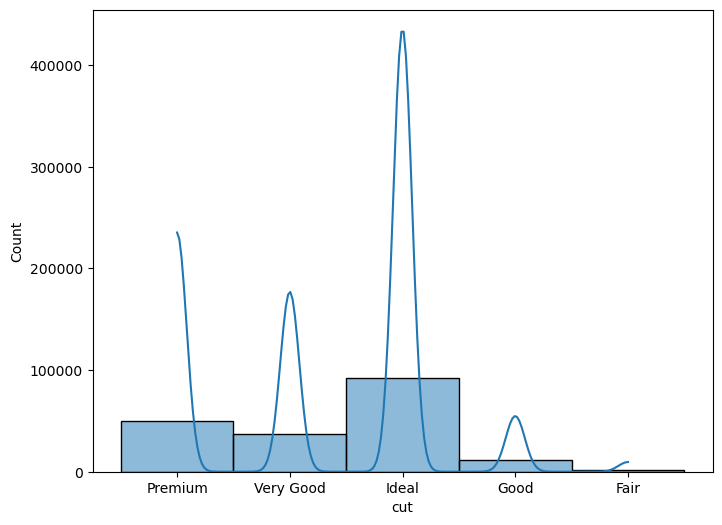

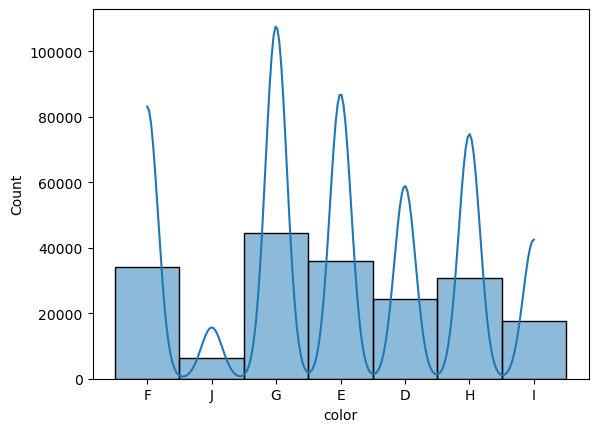

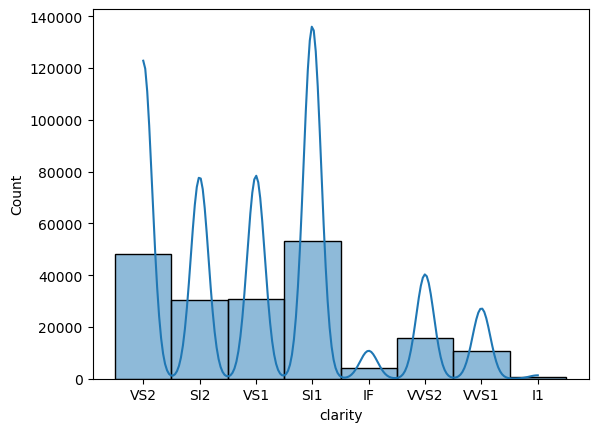

In [18]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

### Feauture Selection

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


<AxesSubplot:>

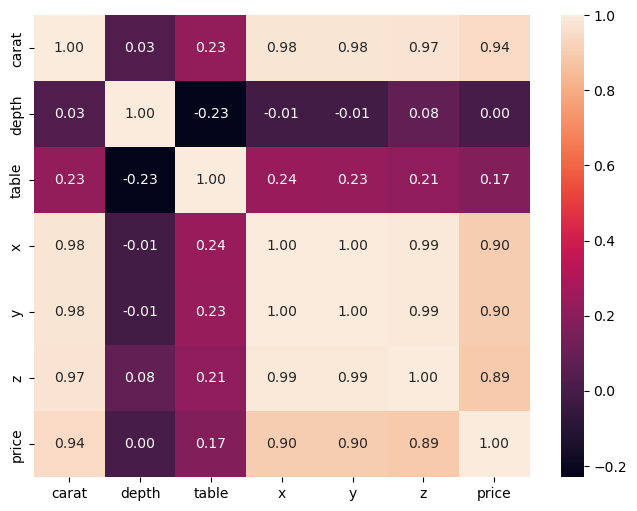

In [20]:
## correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

<b>Observation:</b> Since there is multi-collinearity between x,y,z and carat. It may cause overfitting.

Therefore, Dropping x,y,z from the dataset

In [21]:
df.drop(labels=['x','y','z'],axis=1)

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,681


In [22]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### Mapping ranks to various categories

In [23]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [24]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [25]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [26]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [27]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [28]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [29]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
